In [3]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

## Data Sourcing

In [4]:
# from google.colab import drive
# drive.mount('/content/drive',force_remount=True)

In [5]:
# Setting the random seed so that the results don't vary drastically
np.random.seed(30)
import random as rn
rn.seed(30)
from keras import backend as K
import tensorflow as tf
tf.random.set_seed(30)

In [6]:
# Defining the images folder paths
train_path = '/content/drive/MyDrive/TABLE DATA SET/train_images/'
test_path = '/content/drive/MyDrive/TABLE DATA SET/test_images/'

In [7]:
# Reading the train data
train = pd.read_csv("/content/drive/MyDrive/TABLE DATA SET/train.csv")
train.head()

,image_id,xmin,ymin,xmax,ymax,label
0,0101_003.png,770,946,2070,2973,table
1,0110_099.png,270,1653,2280,2580,table
2,0113_013.png,303,343,2273,2953,table
3,0140_007.png,664,1782,1814,2076,table
4,0146_281.png,704,432,1744,1552,table


In [8]:
# Getting the info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  418 non-null    object
 1   xmin      418 non-null    int64 
 2   ymin      418 non-null    int64 
 3   xmax      418 non-null    int64 
 4   ymax      418 non-null    int64 
 5   label     418 non-null    object
dtypes: int64(4), object(2)
memory usage: 19.7+ KB


In [9]:
# Exploring the train data
train.describe()

,xmin,ymin,xmax,ymax
count,418.000000,418.000000,418.000000,418.000000
mean,433.311005,866.160287,2165.308612,2031.021531
std,355.882817,663.356486,481.848567,725.916668
min,34.000000,10.000000,844.000000,574.000000
25%,213.750000,403.000000,2030.000000,1451.000000
50%,311.000000,550.500000,2263.000000,2076.000000
75%,518.750000,1169.000000,2376.000000,2703.000000
max,1898.000000,3074.000000,3164.000000,3260.000000


In [10]:
# Reading the test data
test = pd.read_csv("/content/drive/MyDrive/TABLE DATA SET/val.csv")
test.head()

,image_id,xmin,ymin,xmax,ymax,label
0,9533_039.png,60,396,1113,2420,table
1,9533_039.png,1143,1126,2240,2230,table
2,9534_001.png,196,378,2146,956,table
3,9534_001.png,184,1028,2160,1636,table
4,9534_028.png,642,1388,1944,1981,table


## Data Validation

We will be validating if the data is correct, to avoid getting incorrect output

In [11]:
# Checking if all imaged IDs are present in the train images folder
train_val = []
imgs = os.listdir('/content/drive/MyDrive/TABLE DATA SET/train_images/')
for i in train.image_id:
    if i not in imgs:
        train_val.append(i)

In [12]:
train_val

['9534_058.png',
 '9534_058.png',
 '9548_031.png',
 '9548_031.png',
 '9560_036.png']

Looks like the above image IDs are not present in train_images folder. Now let's also look vice-versa.

In [13]:
# Checking if all images from train_images folder have image_ids defined
train__folder_val = []
imgs = os.listdir('/content/drive/MyDrive/TABLE DATA SET/train_images/')
for i in imgs:
    if i not in train.image_id.unique():
        train__folder_val.append(i)

In [14]:
train__folder_val

[]

Also, let's check the test data in the same way we did for train data

In [15]:
# Checking if all imaged IDs are present in the test images folder
imgs = os.listdir('/content/drive/MyDrive/TABLE DATA SET/test_images/')
test_val = []
for i in test.image_id:
    if i not in imgs:
        test_val.append(i)

In [16]:
test_val

[]

In [17]:
# Checking if all images from test_images folder have image_ids defined
imgs = os.listdir('/content/drive/MyDrive/TABLE DATA SET/test_images/')
test_folder_val = []
for i in imgs:
    if i not in test.image_id.unique():
        test_folder_val.append(i)

In [18]:
test_folder_val

['9548_031.png', '9534_058.png', '9560_036.png']

Now it is clear that __`three`__ images are wrongly defined in train data while they are present in test set

In [19]:
train['image_id'].nunique()

338

In [20]:
len(os.listdir('/content/drive/MyDrive/TABLE DATA SET/train_images/'))

335

In [21]:
# Moving the wrongly defined IDs from the train data to the test data
mis = train.loc[train['image_id'].isin(train_val)]
train = train.loc[~train['image_id'].isin(train_val)]
train.reset_index(inplace=True)
test = test.append(mis)
test.reset_index(inplace=True)
test.drop('index',axis=1,inplace=True)

In [22]:
train.drop('index',axis=1,inplace=True)

In [23]:
test['image_id'].nunique()

68

In [24]:
len(os.listdir('/content/drive/MyDrive/TABLE DATA SET/test_images/'))

68

Now the data is validated from both train and test sets. Let's now understand the data to get more understanding on it.

## Data Understanding

First we will be extracting the height and widths of each images

In [25]:
train['height'] = train['image_id'].apply(lambda x: img_to_array(load_img('/content/drive/MyDrive/TABLE DATA SET/train_images/'+str(x))).shape[0])

In [26]:
train['width'] = train['image_id'].apply(lambda x: img_to_array(load_img('/content/drive/MyDrive/TABLE DATA SET/train_images/'+str(x))).shape[1])

In [27]:
test['height'] = test['image_id'].apply(lambda x: img_to_array(load_img('/content/drive/MyDrive/TABLE DATA SET/test_images/'+str(x))).shape[0])

In [28]:
test['width'] = test['image_id'].apply(lambda x: img_to_array(load_img('/content/drive/MyDrive/TABLE DATA SET/test_images/'+str(x))).shape[1])

In [29]:
# Exploring the statistical measures of train data
train.describe()

,xmin,ymin,xmax,ymax,height,width
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,435.842615,863.421308,2164.668281,2031.203390,3203.535109,2649.588378
std,357.182301,659.939749,484.644273,723.856475,251.980152,254.138780
min,34.000000,10.000000,844.000000,574.000000,2544.000000,2544.000000
25%,216.000000,406.000000,2026.000000,1454.000000,3300.000000,2544.000000
50%,313.000000,550.000000,2263.000000,2076.000000,3300.000000,2552.000000
75%,520.000000,1160.000000,2376.000000,2703.000000,3300.000000,2560.000000
max,1898.000000,3074.000000,3164.000000,3260.000000,3312.000000,3312.000000


Looking at the minimum and maximum values of each pixel co-ordinates and comparing with the height and width of the images overall, we can say that we don't have the outliers present in the table co-ordinates 

In [30]:
# Exploring the statistical measures of test data
test.describe()

,xmin,ymin,xmax,ymax,height,width
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,419.200000,1006.742857,2091.276190,2040.495238,3264.285714,2587.809524
std,413.807215,701.223711,476.636825,718.065365,160.485185,160.913145
min,10.000000,70.000000,1113.000000,500.000000,2550.000000,2552.000000
25%,156.000000,420.000000,1944.000000,1524.000000,3300.000000,2552.000000
50%,243.000000,712.000000,2254.000000,2070.000000,3300.000000,2552.000000
75%,532.000000,1476.000000,2353.000000,2678.000000,3300.000000,2552.000000
max,1396.000000,2586.000000,3063.000000,3276.000000,3300.000000,3304.000000


Similar comparison as we did for train data is done for test data and this looks perfect as well. 

## Data Preprocessing

In [31]:
# Defining the batch size
batch_size = 15

__Converting the labels from dataframe into numpy arrays__


In [32]:
train1 = np.array(train.drop('label',axis=1))

In [33]:
test1 = np.array(test.drop('label',axis=1))

Since the data labels are defined for same images multiple times for different locations in the images, to reduce the bias while feeding the data, we will be building the generator and get the shuffled data in batches. 

In [34]:
def generator(source_path, df, batch_size):
    """This function is the creates a generator of input image data to feed data in batches 
    into keras model for training and validation
    param-1: - folder path of images
    param-2: - output labels
    param-3: - batch size"""
    
    print( 'Source path = ', source_path, '; batch size =', batch_size)
    
    while True:
        t = np.random.permutation(df) # Randomizing the data
        num_batches = math.floor(len(t) / batch_size) # calculate the number of batches
        
        for batch in range(num_batches): # we iterate over the number of batches
            batch_data = np.zeros((batch_size,330,250,3)) #  defining final size of the input images
            batch_labels = np.zeros((batch_size,4)) # batch_labels is the one hot representation of the output
            
            for imgs in range(batch_size): # iterate over the batch_size
                    
               
                image = load_img(source_path+'/'+ str(t[imgs+ (batch*batch_size)][0]), target_size=(330, 250))
                image = img_to_array(image)
                batch_data[imgs,:,:,0] = image[:,:,0] / 255.0 # normalise and feed in the image
                batch_data[imgs,:,:,1] = image[:,:,1] / 255.0 # normalise and feed in the image
                batch_data[imgs,:,:,2] = image[:,:,2] / 255.0 # normalise and feed in the image
                
                
                h = t[imgs+ (batch*batch_size)][5] # Getting the height of image
                w = t[imgs+ (batch*batch_size)][6] # Getting the width of image
                
                # Scaling the table co-ordinates relative to the spatial dimensions of the input image
                t[imgs+ (batch*batch_size)][1] = float(t[imgs+ (batch*batch_size)][1]) / w 
                t[imgs+ (batch*batch_size)][2] = float(t[imgs+ (batch*batch_size)][2]) / h
                t[imgs+ (batch*batch_size)][3] = float(t[imgs+ (batch*batch_size)][3]) / w
                t[imgs+ (batch*batch_size)][4] = float(t[imgs+ (batch*batch_size)][4]) / h                

                batch_labels[imgs,:] = t[imgs + (batch*batch_size)][1:5]
            yield batch_data, batch_labels #yields the batch_data and the batch_labels
        
        # Now defining for the remaining data points which are left after full batches

        batch_size_rem = len(df) % batch_size # Calculating the batch size of the remaining images
        
        if (batch_size_rem!=0):
            batch_data = np.zeros((batch_size_rem,330,250,3)) 
            batch_labels = np.zeros((batch_size_rem,4)) 
            
            for imgs in range(batch_size_rem):
                image = load_img(source_path+'/'+ str(t[imgs+ (batch_size_rem)][0]), target_size=(330, 250))
                image = img_to_array(image)
                
                batch_data[imgs,:,:,0] = image[:,:,0] / 255.0 #normalise and feed in the image
                batch_data[imgs,:,:,1] = image[:,:,1] / 255.0 #normalise and feed in the image
                batch_data[imgs,:,:,2] = image[:,:,2] / 255.0 #normalise and feed in the image
                
                
                h = t[imgs+ (batch_size_rem)][5]
                w = t[imgs+ (batch_size_rem)][6]
                t[imgs+ (batch_size_rem)][1] = float(t[imgs+ (batch_size_rem)][1]) / w
                t[imgs+ (batch_size_rem)][2] = float(t[imgs+ (batch_size_rem)][2]) / h
                t[imgs+ (batch_size_rem)][3] = float(t[imgs+ (batch_size_rem)][3]) / w
                t[imgs+ (batch_size_rem)][4] = float(t[imgs+ (batch_size_rem)][4]) / h                

                batch_labels[imgs,:] = t[imgs + (batch_size_rem)][1:5]
            yield batch_data, batch_labels 
        

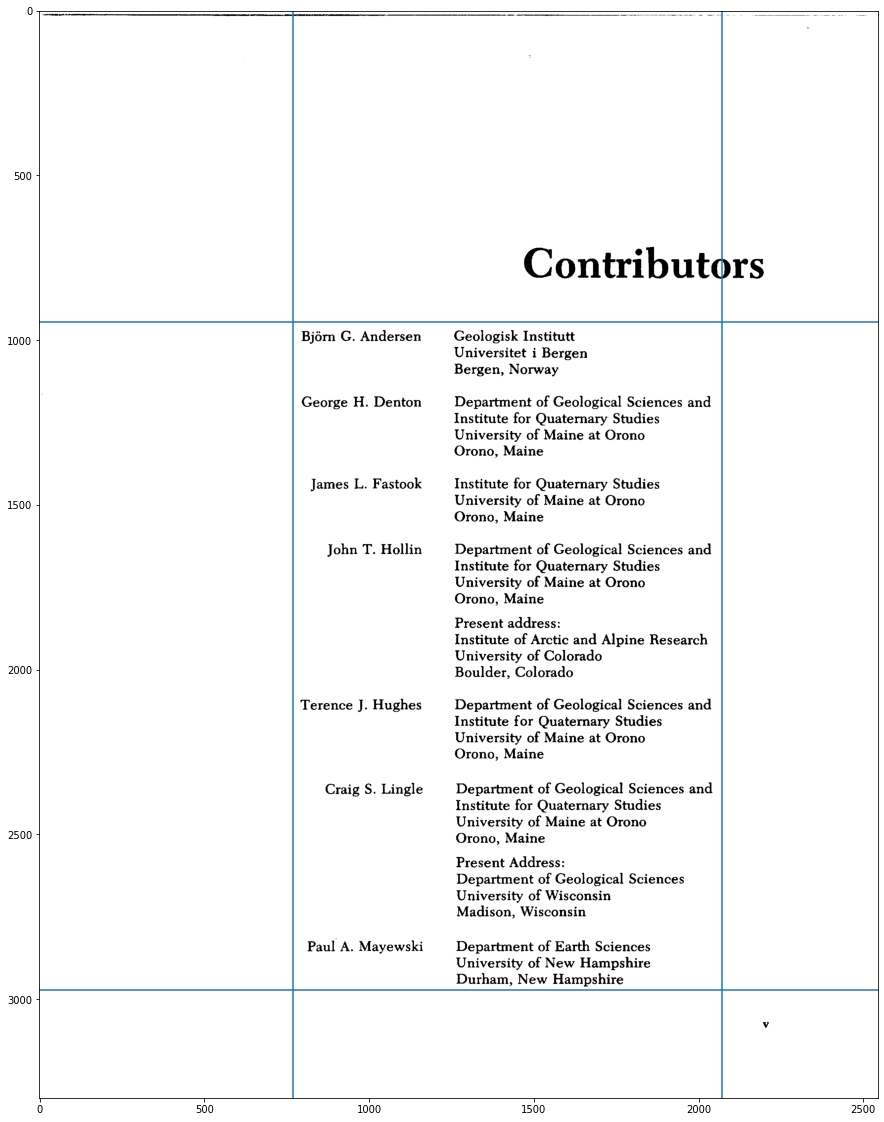

In [37]:
# Looking at the sample image
x = plt.imread("/content/drive/MyDrive/TABLE DATA SET/train_images/0101_003.png")
plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(x, cv2.COLOR_BGR2RGB))
plt.axvline(train1[0,1], linestyle="-")
plt.axvline(train1[0,3], linestyle="-")
plt.axhline(train1[0,2], linestyle="-")
plt.axhline(train1[0,4], linestyle="-")

## Model Building

In [110]:
# Importing required libraries for model building
from keras.models import Sequential, Model
from keras.layers import Dense, GRU, Flatten, BatchNormalization, Activation, Dropout, GlobalAveragePooling2D
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras import optimizers
from keras.regularizers import l2

from keras.applications import mobilenet     #Importing the package for imagenet model

# Creating an imagenet model object
mobilenet_transfer = mobilenet.MobileNet(weights = 'imagenet', include_top = False, input_shape=(330,250,3))

# At the begining of training we need to freeze the weights of pretrained layers
split_at = 50
for layer in mobilenet_transfer.layers[:split_at]:
    layer.trainable = False

for layer in mobilenet_transfer.layers[split_at:]:
    layer.trainable = True

# Adding the main model object and model layers
avg = GlobalAveragePooling2D()(mobilenet_transfer.output)
output = Dense(4, activation="sigmoid")(avg)
model = Model(inputs=mobilenet_transfer.input, outputs=output)


In [112]:
from tensorflow import keras
optimiser = keras.optimizers.Adam(lr=0.01)  #defining optimizer
model.compile(optimizer=optimiser, loss='mse', metrics=['accuracy'])
print (model.summary())

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 330, 250, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 165, 125, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 165, 125, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 165, 125, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 165, 125, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 165, 125, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 165, 125, 32)      0   

In [113]:
# Calling the generator function for both train and test sets
train_generator = generator(train_path, train1, batch_size)
val_generator = generator(test_path, test1, batch_size)

In [114]:
# Getting the details of modelling sequences
import datetime
import math
curr_dt_time = datetime.datetime.now()
num_train_sequences = len(train)
print('# training sequences =', num_train_sequences)
num_val_sequences = len(test)
print('# validation sequences =', num_val_sequences)
num_epochs = 30 # choosing the number of epochs
print ('# epochs =', num_epochs)

# training sequences = 413
# validation sequences = 105
# epochs = 30


In [115]:
# Reducing learning rate when a metric has stopped improving
LR = ReduceLROnPlateau(monitor='val_loss', factor=0.15, patience=8, min_lr=0.001)
callbacks_list = [LR]

The `steps_per_epoch` and `validation_steps` are used by `fit_generator` to decide the number of next() calls it need to make.

In [116]:
if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

Let us now fit the model.

In [117]:
history = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, workers=1, initial_epoch=0)

Source path =  /content/drive/MyDrive/TABLE DATA SET/train_images/ ; batch size = 15
Epoch 1/30
28/28 [==============================] - 17s 471ms/step - loss: 0.1108 - accuracy: 0.6473 - val_loss: 0.1111 - val_accuracy: 0.7524
Epoch 2/30
28/28 [==============================] - 11s 402ms/step - loss: 0.1017 - accuracy: 0.7401 - val_loss: 0.1119 - val_accuracy: 0.7238
Epoch 3/30
28/28 [==============================] - 11s 400ms/step - loss: 0.0892 - accuracy: 0.7454 - val_loss: 0.1125 - val_accuracy: 0.7810
Epoch 4/30
28/28 [==============================] - 11s 400ms/step - loss: 0.0610 - accuracy: 0.7243 - val_loss: 0.1122 - val_accuracy: 0.7048
Epoch 5/30
28/28 [==============================] - 11s 400ms/step - loss: 0.0491 - accuracy: 0.7647 - val_loss: 0.1150 - val_accuracy: 0.7429
Epoch 6/30
28/28 [==============================] - 11s 400ms/step - loss: 0.0414 - accuracy: 0.7965 - val_loss: 0.1317 - val_accuracy: 0.7714
Epoch 7/30
28/28 [==============================] - 11s 3

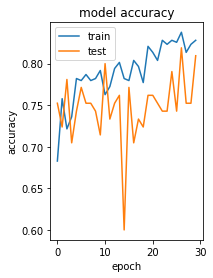

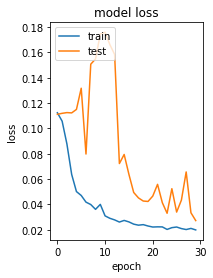

In [118]:
# summarize history for accuracy
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for loss
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()